In [2]:

import replicate
from PIL import Image
from urllib.request import urlretrieve


In [7]:

output = replicate.run(
    "rcalix1/rcalix-flux:c5bb3c03b623d0ab39276806c74e9b24580e640412b0bd27404664f1aa42fe81",
    input={"prompt": "rcalix is wolverine from x-men in plain clothes with claws extended"},
)


In [8]:

res = output[0].url


In [9]:

urlretrieve(res, "out11.png")


('out11.png', <http.client.HTTPMessage at 0x1131d8310>)

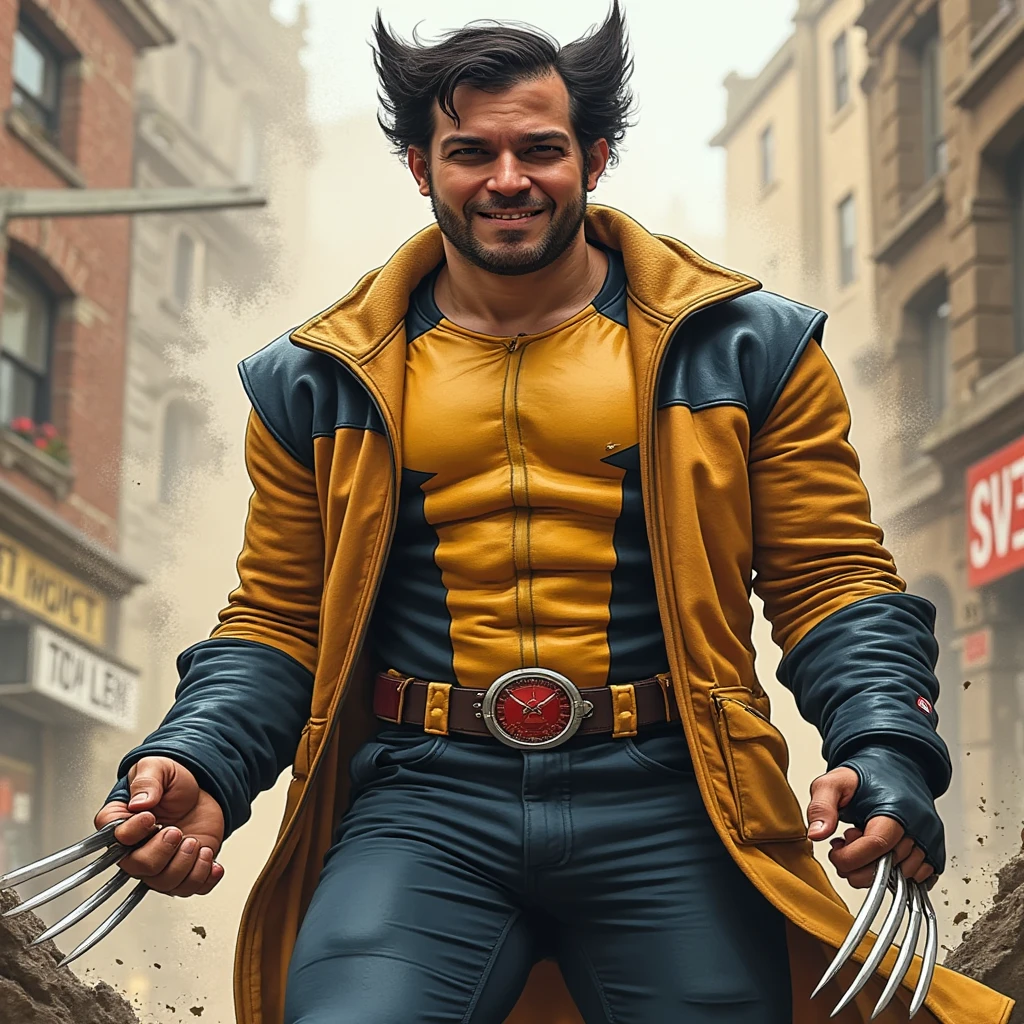

In [10]:

background = Image.open("out11.png")
background


In [11]:

from urllib.request import urlretrieve

model = replicate.models.get("stability-ai/stable-video-diffusion")
version = model.versions.get("3f0457e4619daac51203dedb472816fd4af51f3149fa7a9e0b5ffcf1b8172438")

prediction = replicate.predictions.create(
    version=version,
    input={
      "cond_aug": 0.02,
      "decoding_t": 7,
      "input_image": res,
      "video_length": "14_frames_with_svd",
      "sizing_strategy": "maintain_aspect_ratio",
      "motion_bucket_id": 127,
      "frames_per_second": 6
    })

prediction.wait()

urlretrieve(prediction.output, "out2.mp4")


('out2.mp4', <http.client.HTTPMessage at 0x1131f9100>)

In [12]:

from IPython.display import Video

Video(prediction.output)
